In [2]:
from pathlib import Path
import random
from typing import Union

import numpy as np
import matplotlib.pyplot as plt

$x_{i+1} = ax + bx^2 + cy + dy^2 + exy$

$y_{i+1} = ax + bx^2 + cy + dy^2 + exy$

In [7]:
def quadratic_map_iteration(
    xy: tuple[float, float],
    cx: float,
    ax1: float,
    ax2: float,
    bx1: float,
    bx2: float,
    abx: float,
    cy: float,
    ay1: float,
    ay2: float,
    by1: float,
    by2: float,
    aby: float,
) -> tuple[float, float]:
    x = xy[0]
    y = xy[1]
    x_new = ax1 * x + ax2 * x**2 + bx1 * y + bx2 * y**2 + abx * x * y + cx
    y_new = ay1 * x + ay2 * x**2 + by1 * y + by2 * y**2 + aby * x * y + cy
    return (x_new, y_new)

In [45]:
def quadratic_map(seed: Union[int, None] = None, iterations: int = 100000, parameters: dict[str, float] = {}) -> tuple[int, int, list[float], list[float]]:
    if seed is None:
        # Randomise the seed
        seed = random.randint(0, 1000000000000)
        random.seed(seed)
    else:
        # Set the seed
        random.seed(seed)

    # Starting points
    x = random.uniform(-0.5, 0.5)
    y = random.uniform(-0.5, 0.5)

    # Parameters
    param_lim = 2
    if parameters:
        cx = parameters["cx"]
        ax1 = parameters["ax1"]
        ax2 = parameters["ax2"]
        bx1 = parameters["bx1"]
        bx2 = parameters["bx2"]
        abx = parameters["abx"]
        cy = parameters["cy"]
        ay1 = parameters["ay1"]
        ay2 = parameters["ay2"]
        by1 = parameters["by1"]
        by2 = parameters["by2"]
        aby = parameters["aby"]
    else:
        cx = random.uniform(-param_lim, param_lim)
        ax1 = random.uniform(-param_lim, param_lim)
        ax2 = random.uniform(-param_lim, param_lim)
        bx1 = random.uniform(-param_lim, param_lim)
        bx2 = random.uniform(-param_lim, param_lim)
        abx = random.uniform(-param_lim, param_lim)
        cy = random.uniform(-param_lim, param_lim)
        ay1 = random.uniform(-param_lim, param_lim)
        ay2 = random.uniform(-param_lim, param_lim)
        by1 = random.uniform(-param_lim, param_lim)
        by2 = random.uniform(-param_lim, param_lim)
        aby = random.uniform(-param_lim, param_lim)
    
    print("--- Parameters -----")
    print(f"cx: {cx}\nax1: {ax1}\nax2: {ax2}\nbx1: {bx1}\nbx2: {bx2}\nabx: {abx}\ncy: {cy}\nay1: {ay1}\nay2: {ay2}\nby1: {by1}\nby2: {by2}\naby: {aby}")
    print("--------------------")

    # Value limit
    value_limit = 1000000

    # Convergence check rate. Check that the points are not diverging at this rate
    convergence_check_rate = 100
    convergence_threshold = 0.000001

    # Lists for plotting
    x_list = []
    y_list = []

    # Iterate
    completed = False
    reason = None
    stopped_at = None
    x_old = x
    y_old = y
    for i in range(iterations):
        x, y = quadratic_map_iteration(
            xy=(x, y),
            cx=cx,
            ax1=ax1,
            ax2=ax2,
            bx1=bx1,
            bx2=bx2,
            abx=abx,
            cy=cy,
            ay1=ay1,
            ay2=ay2,
            by1=by1,
            by2=by2,
            aby=aby,
        )
        x_list.append(x)
        y_list.append(y)

        if i % convergence_check_rate == 0:
            # Check for convergence
            if abs(x - x_old) < convergence_threshold and abs(y - y_old) < convergence_threshold:
                reason = "CONVERGENCE"
                stopped_at = i
                break
            x_old = x
            y_old = y

        # If the point is outside the limit, break
        if abs(x) > value_limit or abs(y) > value_limit:
            reason = "LIMIT REACHED"
            stopped_at = i
            break
    else:
        completed = True

    if not completed:
        # print(f"Stopped after [{stopped_at}] iterations due to [{reason}].")
        return 0, seed, x_list, y_list
    return 1, seed, x_list, y_list


def plot_quadratic_map(x_list: list[float], y_list: list[float], seed: int, save: bool = False, markersize: float = 0.5, colour: str = "black"):
    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x_list, y_list, s=markersize, c=colour, edgecolors="none")
    # ax.set_xlim(-1, 1)
    # ax.set_ylim(-1, 1)
    ax.set_title(f"Seed: {seed}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.show()

    if save:
        # Save
        save_path = Path(f"output/{seed}.png")
        fig.savefig(str(save_path), dpi=300, bbox_inches="tight")


def try_lots_of_quadratic_maps(n: int):
    for i in range(n):
        success, seed, x_list, y_list = quadratic_map()

        if success == 1:
            # Print seed
            print(f"Success at iteration [{i}]. Seed: [{seed}]")

            # Plot
            plot_quadratic_map(x_list, y_list, seed)

            break

Success at iteration [182]. Seed: [465016400667]


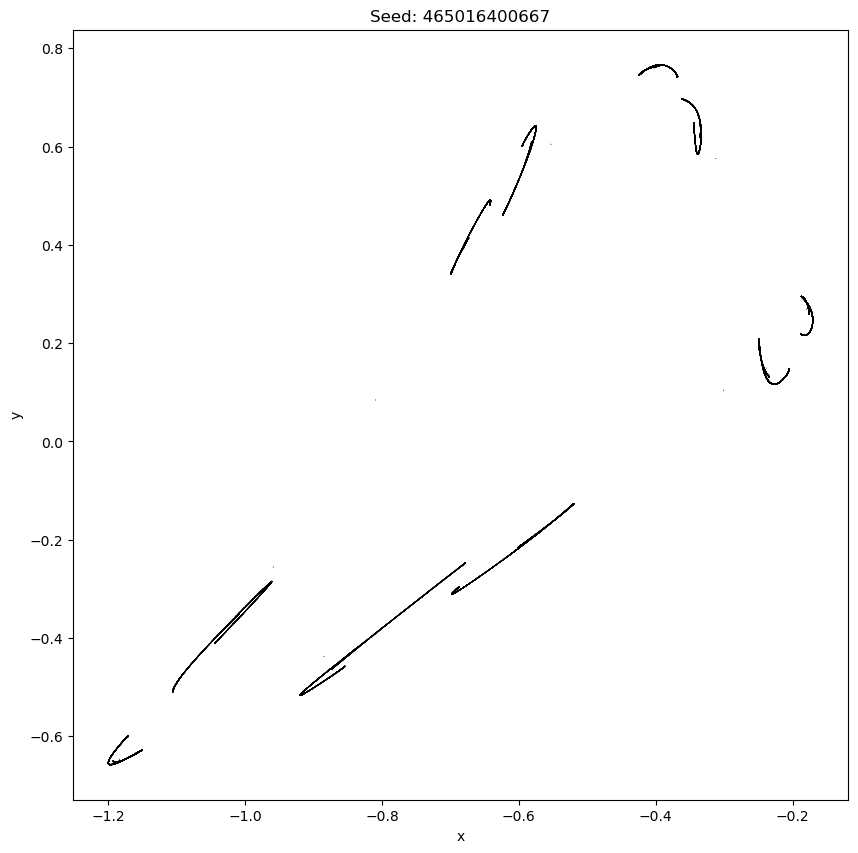

In [683]:
try_lots_of_quadratic_maps(1000)

--- Parameters -----
cx: 0.3838553316339084
ax1: -0.899810341784411
ax2: 1.9205488476943802
bx1: 0.12453878265145724
bx2: -0.8166571696362626
abx: 1.1693540077638689
cy: -0.3785235686217754
ay1: -0.3015972313215656
ay2: 1.6636275870850334
by1: 0.919314974001602
by2: 0.65431157442239
aby: 1.6164791960203302
--------------------


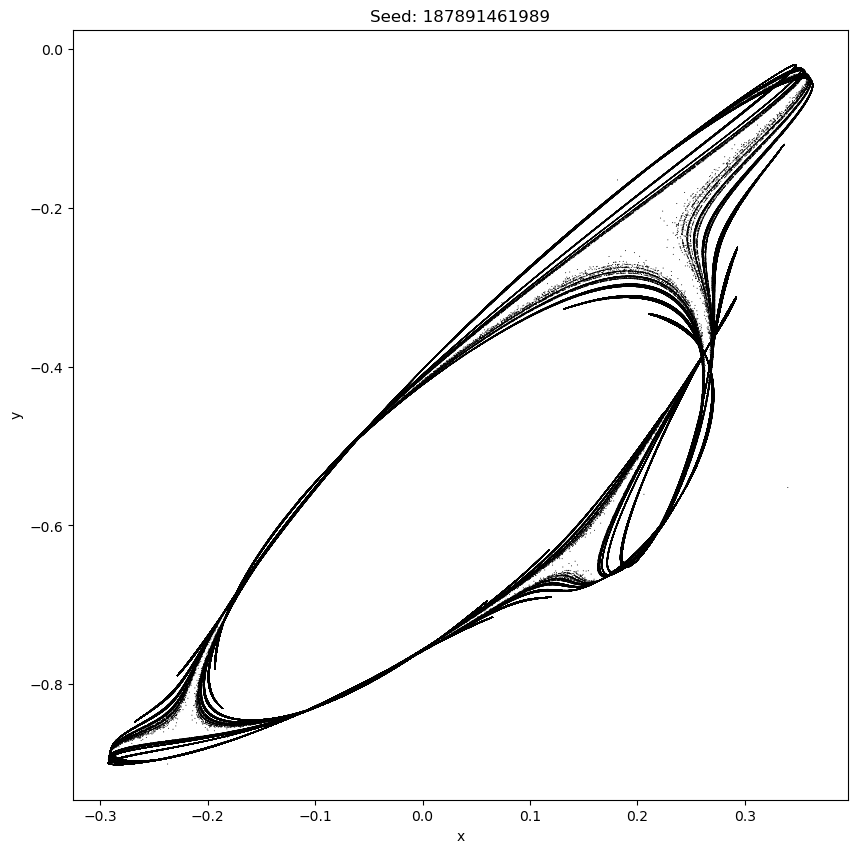

[3810.6511355   378.56457726 2868.20052678 3014.45042285  709.29127283
 2228.43517861 2843.00738155   93.04371232 3794.1231498  3411.43435874]
[1594.25481355   53.84921736 3307.2223435  1556.34048194  203.37799095
 2623.79653148 1131.61067946  102.41775371 3830.75277892 2453.35286472]
[3810  378 2868 3014  709 2228 2843   93 3794 3411]
[1594   53 3307 1556  203 2623 1131  102 3830 2453]
3949
3949


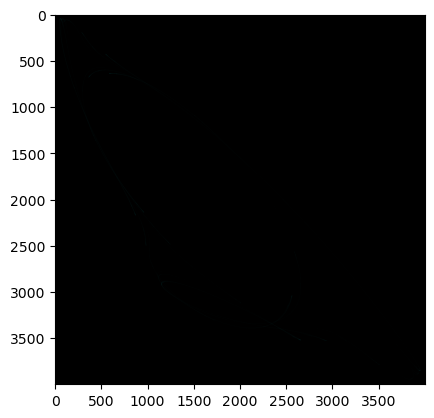

In [46]:
seed = 187891461989
success, seed, x_list, y_list = quadratic_map(seed=seed, iterations=1000000)

plot_quadratic_map(x_list, y_list, seed, save=True)

# Create RGB image
img = np.zeros((4000, 4000, 3), dtype=np.uint8)

xs = np.array(x_list)
ys = np.array(y_list)

buffer = 200
# Normalise
xs = xs - np.min(xs)
xs = ((xs / np.max(xs)) * (img.shape[0] - buffer/2 - 1)) + buffer/4
ys = ys - np.min(ys)
ys = ((ys / np.max(ys)) * (img.shape[1] - buffer/2 - 1)) + buffer/4

print(xs[0:10])
print(ys[0:10])

xs = xs.astype(int)
ys = ys.astype(int)

print(xs[0:10])
print(ys[0:10])

print(np.max(xs))
print(np.max(ys))

# Update image array
for coord in zip(xs, ys):
    x = coord[0]
    y = coord[1]
    img[x, y, 1:] += 1
    if img[x, y, 0] > 255:
        img[x, y, 0] = 255
    if img[x, y, 1] > 255:
        img[x, y, 1] = 255
    if img[x, y, 2] > 255:
        img[x, y, 2] = 255

plt.imshow(img)
plt.imsave(f"output/quadratic_{seed}.png", img)
    